# Project playground

This file is used to check out the bechdel test and geting familiar with it

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
import json
import math
from statsmodels.stats import diagnostic
from scipy import stats

#### Getting the Bechdel test database

The code below is used to get the Bechdel test results ffrom the API and sotore that in a DataFrame

In [2]:

url = 'http://bechdeltest.com/api/v1/getAllMovies'

response = requests.get(url)

if response.status_code == 200:
    print('Request was succesful')
    movie_data = response.json()
    df_bechdel = pd.DataFrame(movie_data)
    print(df_bechdel.sample())

else:
    print('Request failed')

Request was succesful
       imdbid     title  rating  year     id
2411  0091217  Hoosiers       1  1986  10893


In [3]:
df_bechdel.sample(10)

,imdbid,title,rating,year,id
9666,2948372,Soul,3,2020,9508
8129,3099498,Tusk,0,2014,10954
5863,0417741,Harry Potter and the Half-Blood Prince,3,2009,375
949,0052357,Vertigo,1,1958,609
8434,4085084,Maryland,0,2015,8079
8100,2377322,Deliver Us From Evil,2,2014,8377
9341,7689052,Daphne &amp; Velma,3,2018,10134
3981,0229340,Dinner Rush,3,2000,6874
3121,0110932,Quiz Show,2,1994,4954
6513,1735853,Como Esquecer,3,2010,5830


In [4]:
data_folder = './MovieSummaries/'

column_names= ['wikipedia_movie_id', 'freebase_id','title','release_date','revenue','runtime','language','countries','genre']

df_movies=pd.read_csv(data_folder + 'movie.metadata.tsv', sep = '\t', names=column_names)
df_movies.head(10)


,wikipedia_movie_id,freebase_id,title,release_date,revenue,runtime,language,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [5]:
column_names = ['movie_freebase_id', 'release_date','character_name','birth','gender','character_height', 'actor_ethnicity',
                'actor_name','actor_age', 'actor_gender_freebase_id','character_freebase_id','freebase_character_map']

df_characters=pd.read_csv(data_folder+'/character.metadata.tsv', sep= '\t', names = column_names)

df_characters.index.name='wikipedia_movie_id'

df_characters.sample(8)

,movie_freebase_id,release_date,character_name,birth,gender,character_height,actor_ethnicity,actor_name,actor_age,actor_gender_freebase_id,character_freebase_id,freebase_character_map
wikipedia_movie_id,,,,,,,,,,,,
24026813,/m/07k4d90,1925-12-21,Thief,1902-06-18,M,NaN,NaN,Boris Barnet,23.0,/m/0jb4hg4,/m/0jb4hh1,/m/03g_8fl
34289787,/m/0hzm_3n,2012-05-23,Blond Boy's Mother,1966-06-28,F,1.750,/m/03lmx1,Sara Stewart,45.0,/m/0n4g1p1,/m/0n4g1p4,/m/0264b5q
32817565,/m/0h3qq4p,1936,NaN,1902-11-23,M,NaN,NaN,Victor Jory,33.0,/m/0h9gr66,NaN,/m/05rs2c
13875263,/m/03clxwx,2008-06-17,Alisa,1987-06-18,M,NaN,NaN,Red Madrell,20.0,/m/0gc6c2_,/m/0h6f1rj,/m/03wht99
22280291,/m/05q8hrw,1997,Ari Leschnikoff,1960-03-18,M,NaN,NaN,Max Tidof,36.0,/m/051r9hd,/m/0c1mb_2,/m/051r9hh
13861681,/m/03cljmh,1968,NaN,1938-09-12,M,NaN,NaN,Patrick Mower,29.0,/m/0mzq9lz,NaN,/m/0885tr
24785563,/m/080gz3m,1938-06-17,NaN,1917-10-22,F,1.600,/m/03vv99,Joan Fontaine,20.0,/m/08c_l1k,NaN,/m/018qms
3576873,/m/09mnhy,1996-03-29,NaN,1943-11-12,M,1.575,/m/048z7l,Wallace Shawn,52.0,/m/0cg21bm,NaN,/m/085q5


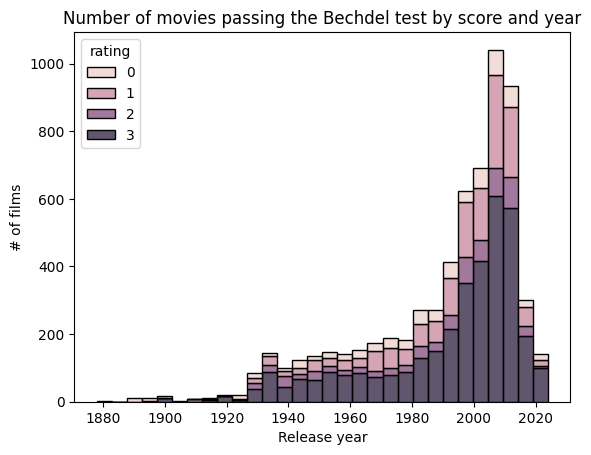

In [6]:
#The Bechdel Test, or Bechdel-Wallace Test, sometimes called the Mo Movie Measure or Bechdel Rule is a simple test 
# which names the following three criteria: 
# (1) it has to have at least two women in it, who 
# (2) who talk to each other, about 
# (3) something besides a man.


#we here want to plot the number of movies passing the Bechdel test by year


df_mb = pd.merge(df_movies, df_bechdel, how= 'inner')


sns.histplot(data=df_mb, x='year', hue='rating',multiple='stack',bins=30)

plt.title('Number of movies passing the Bechdel test by score and year')
plt.xlabel('Release year')
plt.ylabel('# of films');



In [7]:
df_mb['countries'].value_counts()

def get_continent(country_list):
    try:
        country_dict=json.loads(country_list)

        if not country_dict:
            return None

        country_name = list(country_dict.values())[0]
        country_alpha2=pc.country_name_to_country_alpha2(country_name)
        return pc.country_alpha2_to_continent_code(country_alpha2)
    except KeyError or IndexError:
        return None

df_mb['continent']=df_mb['countries'].apply(get_continent)

df_mb['continent'].value_counts()

continent
NA    4336
EU    1153
AS     419
OC      92
SA      18
AF       8
Name: count, dtype: int64

We can see a clear underrepresentation in films that are neither Northamerican nor european in the bechdel test results.

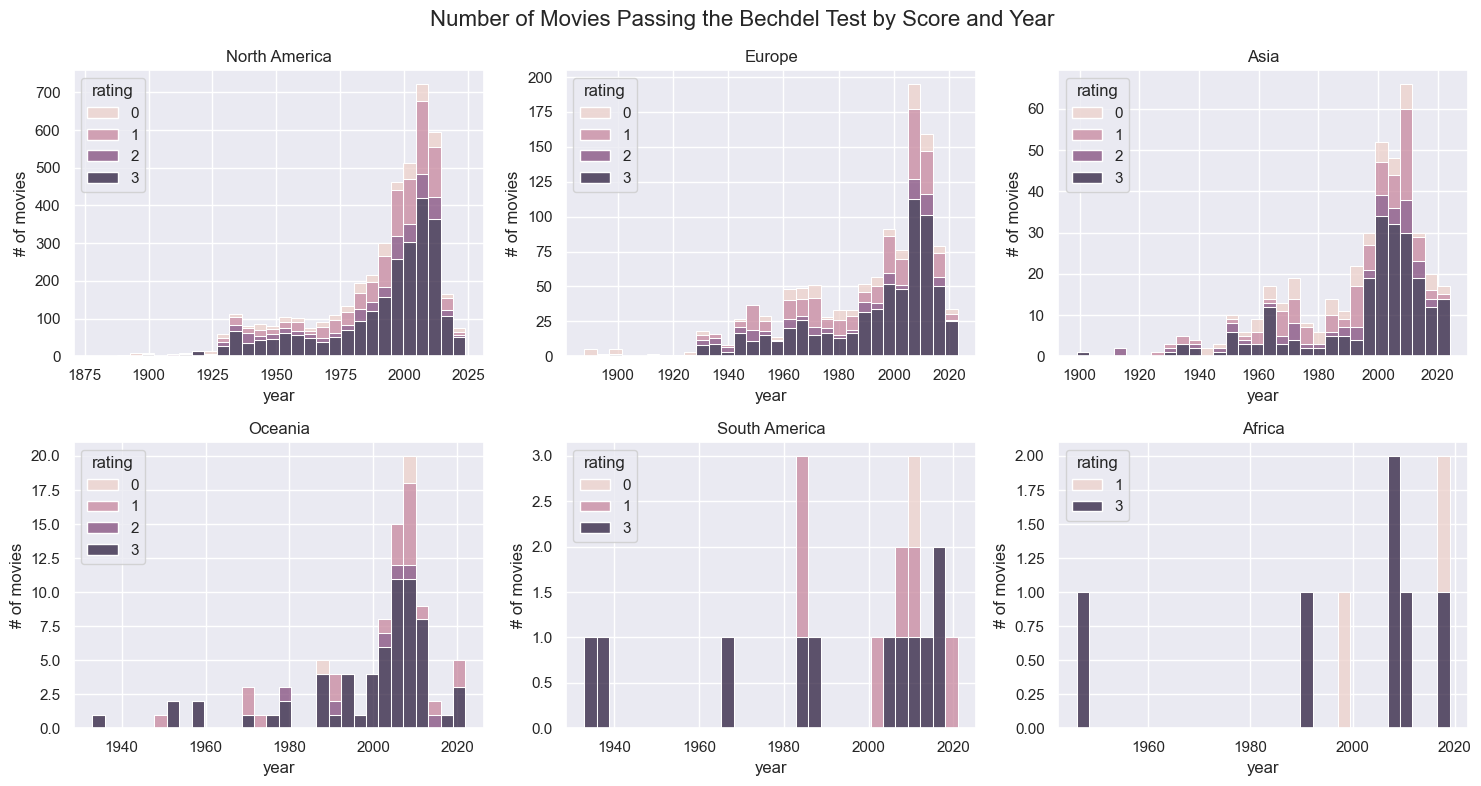

In [8]:
#by region now

sns.set()

fig, axes = plt.subplots(2,3, figsize = (15,8))

fig.suptitle('Number of Movies Passing the Bechdel Test by Score and Year', fontsize=16)

sns.histplot(data=df_mb[df_mb['continent'] == 'NA'], x='year', hue='rating', multiple='stack', bins=30, ax=axes[0,0]).set(title='North America', 
                                                                                                                          ylabel = '# of movies')
sns.histplot(data=df_mb[df_mb['continent'] == 'EU'], x='year', hue='rating', multiple='stack', bins=30, ax=axes[0,1]).set(title='Europe', 
                                                                                                                          ylabel = '# of movies')
sns.histplot(data=df_mb[df_mb['continent'] == 'AS'], x='year', hue='rating', multiple='stack', bins=30, ax=axes[0,2]).set(title='Asia', 
                                                                                                                          ylabel = '# of movies')
sns.histplot(data=df_mb[df_mb['continent'] == 'OC'], x='year', hue='rating', multiple='stack', bins=30, ax=axes[1,0]).set(title='Oceania', 
                                                                                                                          ylabel = '# of movies')
sns.histplot(data=df_mb[df_mb['continent'] == 'SA'], x='year', hue='rating', multiple='stack', bins=30, ax=axes[1,1]).set(title='South America', 
                                                                                                                          ylabel = '# of movies')
sns.histplot(data=df_mb[df_mb['continent'] == 'AF'], x='year', hue='rating', multiple='stack', bins=30, ax=axes[1,2]).set(title='Africa', 
                                                                                                                          ylabel = '# of movies')

plt.tight_layout(rect=[0, 0, 1, 1]);


In [9]:
female_counts = df_characters[df_characters['gender'] == 'F'].groupby('wikipedia_movie_id').size().reset_index(name='nbr_female_actors')

# Merge the counts into df_mb, ensuring all rows from df_mb are retained (left join)
df_mb = df_mb.merge(female_counts, on='wikipedia_movie_id', how='left')


df_mb.sample(15)

,wikipedia_movie_id,freebase_id,title,release_date,revenue,runtime,language,countries,genre,imdbid,rating,year,id,continent,nbr_female_actors
2582,14339420,/m/03d1029,Heidi,1968-11-01,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hqxf"": ""Family Film"", ""/m/02h8pkk"": ""Fam...",0107099,3,1993,5285,NA,2.0
5189,2500472,/m/07j77p,Fun with Dick and Jane,1977-02-09,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/05p553"": ""Comedy film""}",0369441,3,2005,2518,NA,4.0
3944,99454,/m/0pd4f,Patton,1970-03-26,61749765.0,170.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/02bjrlw"": ""...","{""/m/09c7w0"": ""United States of America""}","{""/m/017fp"": ""Biography"", ""/m/0hj3mws"": ""Biopi...",0066206,1,1970,9594,NA,NaN
720,28272795,/m/0g4pmz_,One Day,2011-08-08,56706628.0,107.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",1563738,1,2011,7028,NA,8.0
3451,30733054,/m/0f13bcc,Trigger,2010,NaN,78.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...",1624408,3,2010,1938,NA,5.0
4898,5258501,/m/0db7yl,Dien Bien Phu,1992-03-04,NaN,140.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France"", ""/m/01crd5"": ""Vietnam""}","{""/m/082gq"": ""War film""}",0104105,0,1992,9107,EU,NaN
5269,846311,/m/03gln9,Armed and Dangerous,1986-08-15,15945534.0,88.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/02kdv5l...",0090660,1,1986,2421,NA,2.0
5414,19474206,/m/04n6k4r,Pilgrimage,2001,NaN,18.0,"{""/m/02h40lc"": ""English Language""}",{},"{""/m/02hmvc"": ""Short Film"", ""/m/0jtdp"": ""Docum...",3531202,0,2017,7870,None,NaN
6106,26100617,/m/0b6l90w,Slashers,2001,NaN,99.0,{},"{""/m/0d060g"": ""Canada""}","{""/m/0qdzd"": ""B-movie"", ""/m/03npn"": ""Horror"", ...",0286975,3,2001,225,NA,NaN
1027,181353,/m/018shj,Leave Her to Heaven,1945-12-19,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01lrrt"": ""Me...",0037865,3,1945,10235,NA,3.0


Pearson correlation: 0.27031974999619834, p-value: 1.5191396216278685e-93
Spearman correlation: 0.2886013063776424, p-value: 6.298546235701027e-107


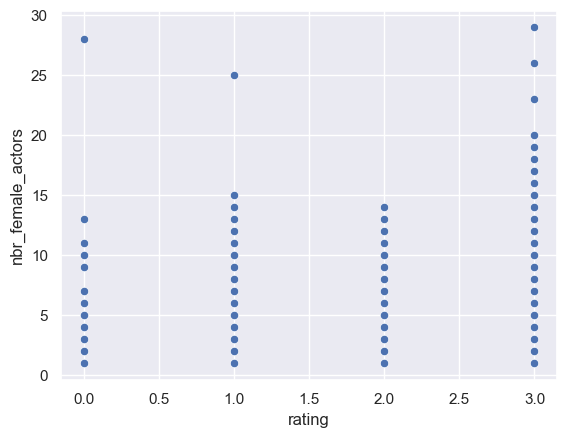

In [10]:
#We will here do a scatterplot between the bechdel test score and the number of female acotrs in each movie

sns.scatterplot(data=df_mb, y='nbr_female_actors',x='rating')

valid_data = df_mb[df_mb['nbr_female_actors'].notna()]

correlation, p_value = stats.pearsonr(valid_data['nbr_female_actors'], valid_data['rating'])

print(f"Pearson correlation: {correlation}, p-value: {p_value}")

correlation, p_value = stats.spearmanr(valid_data['nbr_female_actors'], valid_data['rating'])

print(f"Spearman correlation: {correlation}, p-value: {p_value}")

primary_genre
Thriller                          1189
Drama                              619
Crime Fiction                      433
Romantic comedy                    417
Science Fiction                    205
                                  ... 
Media Studies                        1
Nature                               1
Sci Fi Pictures original films       1
Slice of life story                  1
Concert film                         1
Name: count, Length: 169, dtype: int64

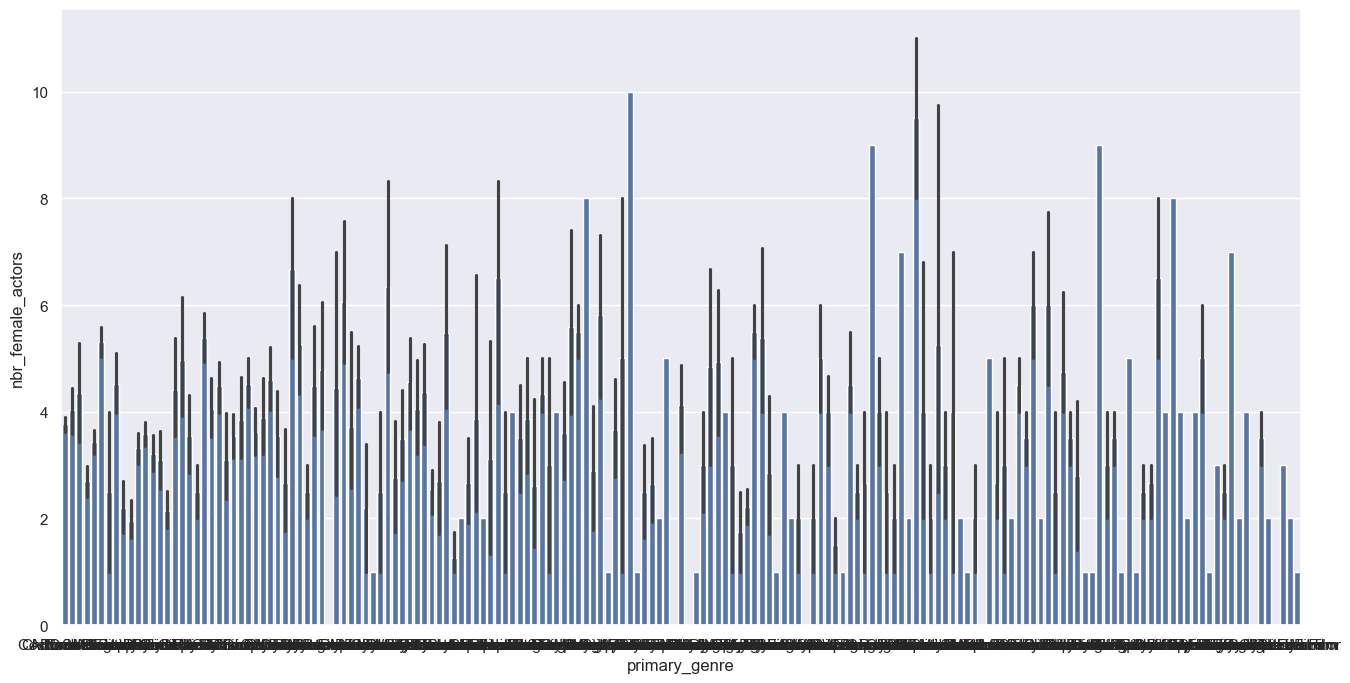

In [23]:
#We will here do a scatterplot between the bechdel test score and the number of female acotrs in each movie

def get_primary_genre(genre_list):
    try:
        genre_dict=json.loads(genre_list)

        if not genre_dict:
            return None

        primary_genre = list(genre_dict.values())[0]
        return primary_genre
    except KeyError or IndexError:
        return None


df_mb['primary_genre'] = df_mb['genre'].apply(get_primary_genre)

plt.figure(figsize=(16, 8))
sns.barplot(data=df_mb, y='nbr_female_actors',x='primary_genre')

df_mb['primary_genre'].value_counts()
